#### Required Libraries for logic

In [82]:
import numpy as np
from IPython.utils import io
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

#### Required Libraries for visualization

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt

#### Impotant parameters

In [84]:
saved = False # Set to True if you want to load the saved data
n_gram = 1 # Set to 1 for unigram, 2 for bigram, 3 for trigram, 4 for Uni+Bi and 5 for Bi+Tri
n_components = 3 # Set to 2 for 2D, 3 for 3D
oversampling = False # Set to True if you want to oversample the minority class

In [85]:
DIR = lambda x : f'../../Dataset/SavedFeatures/TF-IDF/{x}.npy'
D_DIR = lambda x : f'../../Dataset/{x}.npy'
if saved:
    n_gram = np.load(DIR('n_gram'), allow_pickle=True)
    oversampling = np.load(DIR('oversampling'), allow_pickle=True)
    x = np.load(DIR('x'), allow_pickle=True)
    X = np.load(DIR('X_test'), allow_pickle=True)
    y1 = np.load(D_DIR('y1'), allow_pickle=True)
    y2 = np.load(D_DIR('y2'), allow_pickle=True)
    Y1 = np.load(D_DIR('Y1_test'), allow_pickle=True)
    Y2 = np.load(D_DIR('Y2_test'), allow_pickle=True)
    vocabulary = np.load(DIR('vocabulary'), allow_pickle=True).tolist()
    Preprocessing = dict(np.load(DIR('Preprocessing'), allow_pickle=True).flatten()[0])

In [86]:
if not saved:
    with io.capture_output() as captured: 
        %run ../../1-Preprocessing/Preprocessing/Preprocess.ipynb import x, y1, y2, X, Y1, Y2, vocabulary, Preprocessing

#### Join the Tweets into a Corpus

In [ ]:
if not saved:
    x = [' '.join(tweet) for tweet in x]
    X = [' '.join(tweet) for tweet in X]

#### Run TF-IDF on the Corpus depending on specified N-gram

In [ ]:
if not saved and n_gram == 1:
    unigram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (1,1), use_idf=True, smooth_idf=True)

    x = unigram_vectorizer.fit_transform(x)

    X = unigram_vectorizer.transform(X)

In [ ]:
if not saved and n_gram == 2:
    bigram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (2,2), use_idf=True, smooth_idf=True)

    x = bigram_vectorizer.fit_transform(x)

    X = bigram_vectorizer.transform(X)

In [ ]:
if not saved and n_gram == 3:
    trigram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (3,3), use_idf=True, smooth_idf=True)

    x = trigram_vectorizer.fit_transform(x)

    X = trigram_vectorizer.transform(X)

In [ ]:
if not saved and n_gram == 4:
    ngram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (1,2), use_idf=True, smooth_idf=True)

    x = ngram_vectorizer.fit_transform(x)

    X = ngram_vectorizer.transform(X)

In [ ]:
if not saved and n_gram == 5:
    ngram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (2,3), use_idf=True, smooth_idf=True)

    x = ngram_vectorizer.fit_transform(x)

    X = ngram_vectorizer.transform(X)

In [ ]:
if not saved and oversampling:
    sm = SMOTE()
    x, y1 = sm.fit_resample(x, y1)
    # x, y2 = sm.fit_resample(x, y2)

In [ ]:
if n_gram == 1:
    Features = {"method": "TF-IDF", "n-gram": "Uni", "oversampling": oversampling}
if n_gram == 2:
    Features = {"method": "TF-IDF", "n-gram": "Bi", "oversampling": oversampling}
if n_gram == 3:
    Features = {"method": "TF-IDF", "n-gram": "Tri", "oversampling": oversampling}
if n_gram == 4:
    Features = {"method": "TF-IDF", "n-gram": "Uni+Bi", "oversampling": oversampling}
if n_gram == 5:
    Features = {"method": "TF-IDF", "n-gram": "Bi+Tri", "oversampling": oversampling}

### Visualize the features

#### Perform truncated SVD on the features to reduce the dimensionality

In [ ]:
if not saved:
    tsvd = TruncatedSVD(n_components = n_components)

    feature = tsvd.fit_transform(x)

#### plotting features

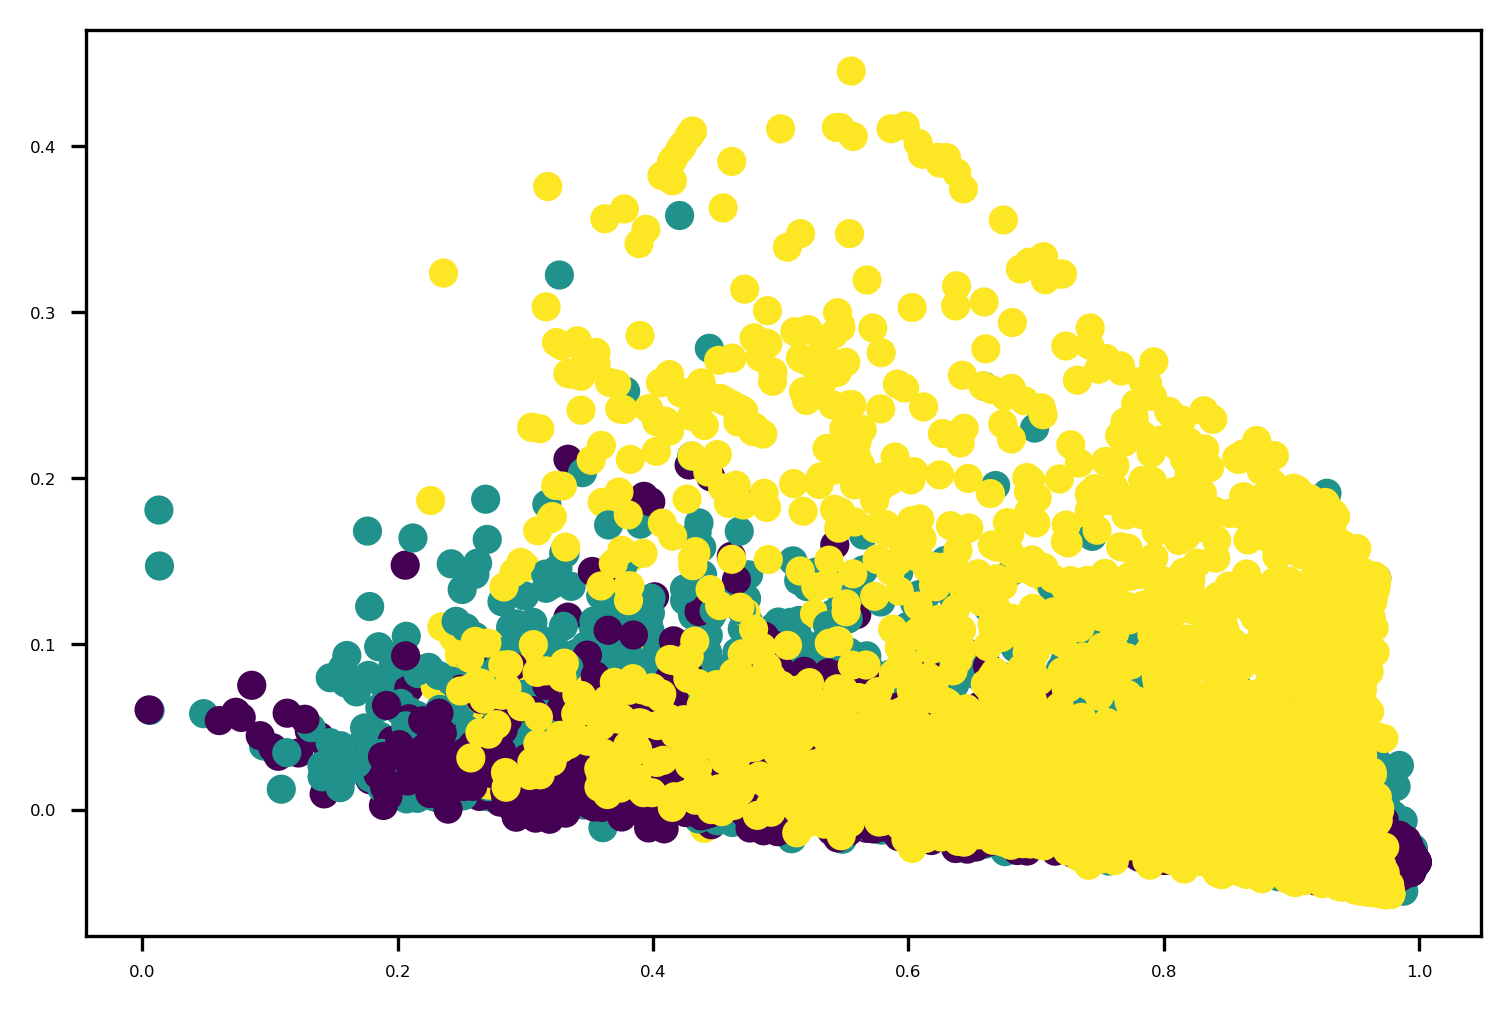

In [ ]:
if not saved:
    if n_components == 2:
        fig = plt.figure()
        ax = plt.axes()

        ax.scatter(feature[:,0], feature[:,1], c=y1)
    elif n_components == 3:
        fig = plt.figure()
        ax = plt.axes(projection = '3d')

        ax.scatter3D(feature[:,0], feature[:,1], feature[:,2], c=y1)

#### Save the features

In [ ]:
if not saved:
    np.save(DIR('n_gram'), n_gram)
    np.save(DIR('oversampling'), oversampling)
    np.save(DIR('x'), x)
    np.save(DIR('X_test'), X)
    np.save(DIR('vocabulary'), vocabulary)
    np.save(DIR('Preprocessing'), Preprocessing)